In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import lightgbm as lgb
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from chinese_calendar import is_workday, is_holiday
import seaborn as sns
import re
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
df = pd.read_csv('./data/cooling_hour_v2.csv', parse_dates=['时间']).dropna().reset_index()

In [27]:
df.head()

,index,时间,ce_cold,ce_temp,cw_cold,cw_temp,dry_temp,o1_cold,o1_temp,o2_cold,o2_temp
0,0,2017-05-25 12:00:00,1698.555217,24.509726,382.464298,25.470814,26.374286,1032.862150,23.879254,694.506345,23.409014
1,1,2017-05-25 13:00:00,1933.293879,24.566837,353.073287,25.482020,26.926333,1103.429427,23.988247,717.551680,23.440700
2,2,2017-05-25 14:00:00,1694.346086,24.407470,395.100368,25.321645,27.579667,1091.022464,24.159955,720.426745,23.482717
3,3,2017-05-25 15:00:00,1583.777496,24.462997,399.857500,25.279103,27.553167,1105.372427,24.279813,707.009301,23.488158
4,4,2017-05-25 16:00:00,1657.522083,24.486100,411.738206,25.382945,27.667000,1203.675505,24.444663,724.174842,23.463333


In [28]:
def add_feature(x):
    x['is_holiday'] = x['时间'].apply(is_holiday).astype(int)
    x['month'] = x['时间'].dt.month
    x['hour'] = x['时间'].dt.hour
    x['weekday'] = x['时间'].dt.weekday
    return x

df = add_feature(df)

In [29]:
workday = df.is_holiday == 0
daytime = (df.hour <= 18) & (df.hour >= 9)
night = (df.hour > 18) & (df.hour < 22)
summer = df.month.isin([6,7,8,9])

## Cooling Distribution

#### Cooling & House Temperature Pair Scatter

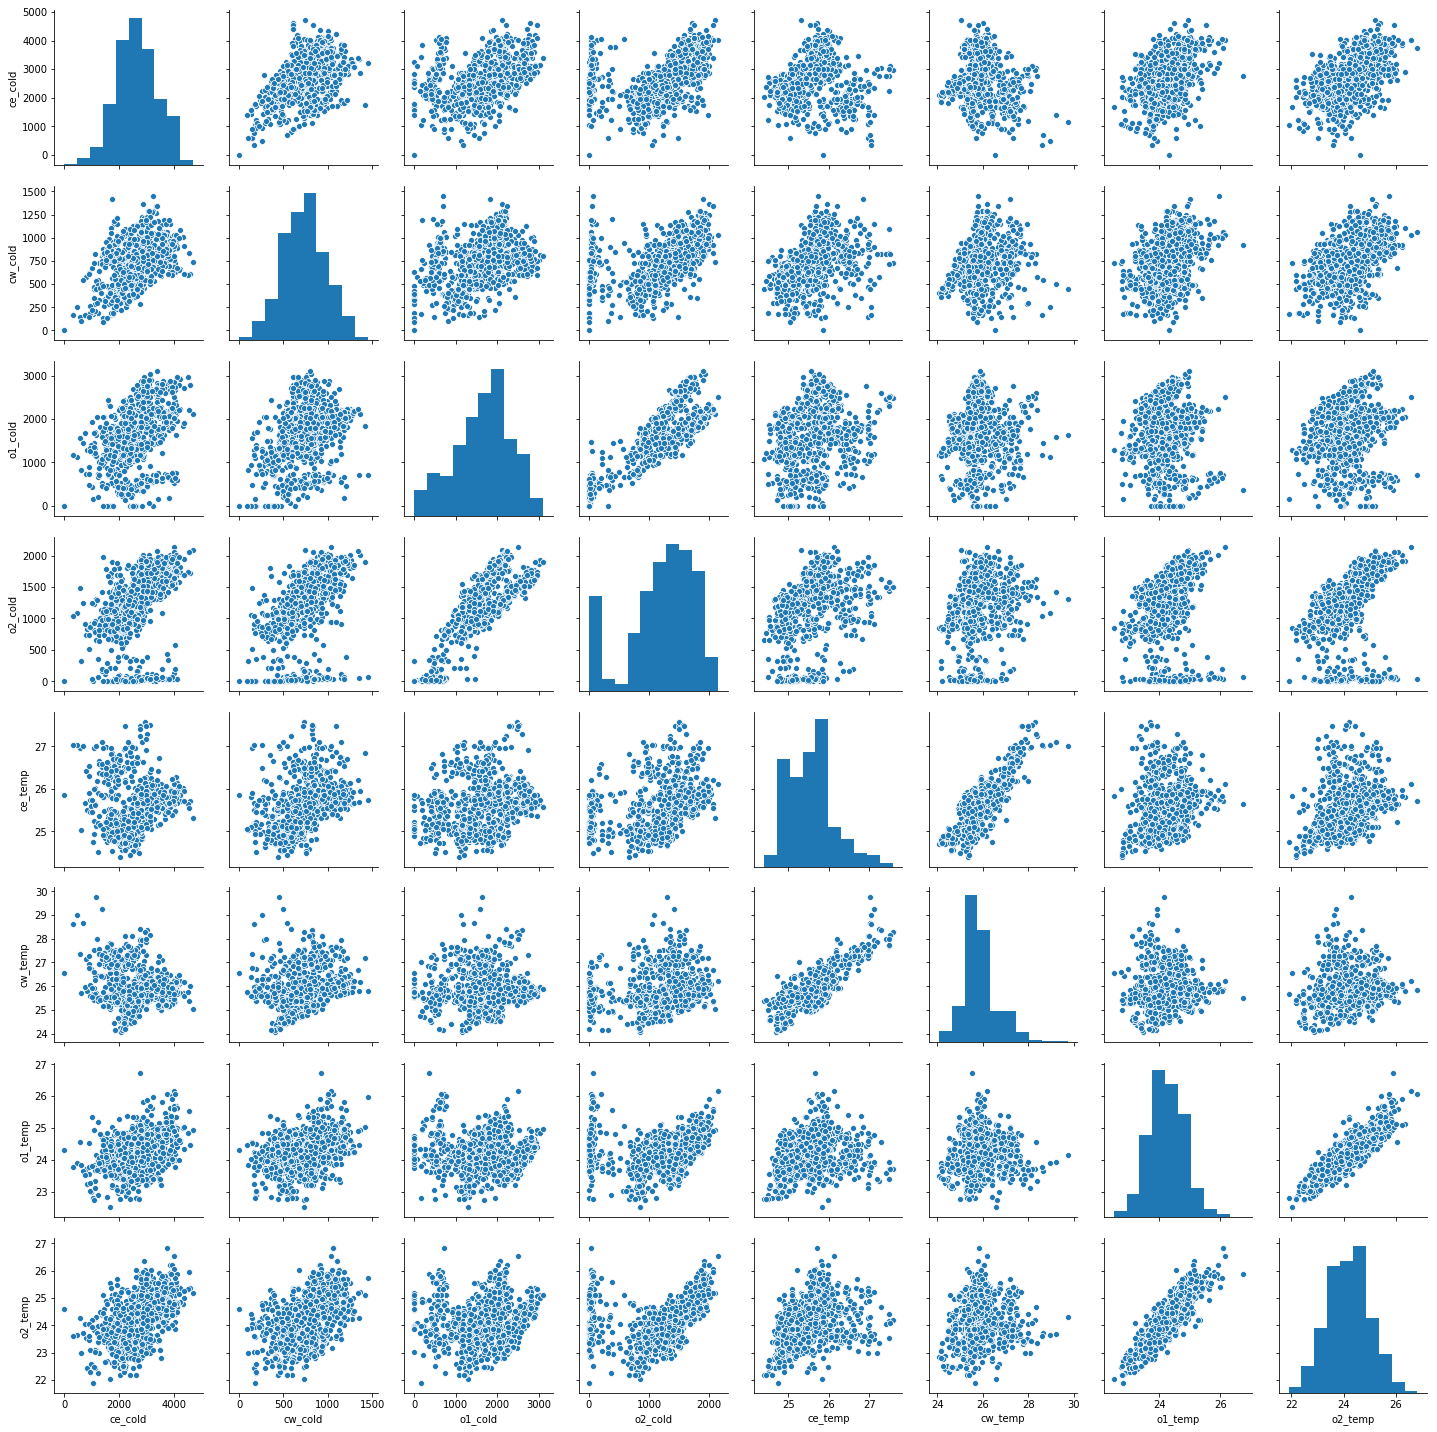

In [30]:
sns.pairplot(
    data=df[workday & daytime & summer].sample(1000)[['ce_cold', 'cw_cold', 'o1_cold', 'o2_cold', 
                           'ce_temp', 'cw_temp', 'o1_temp', 'o2_temp']],)

#### Cooling & Dry Temperature Pair Scatter

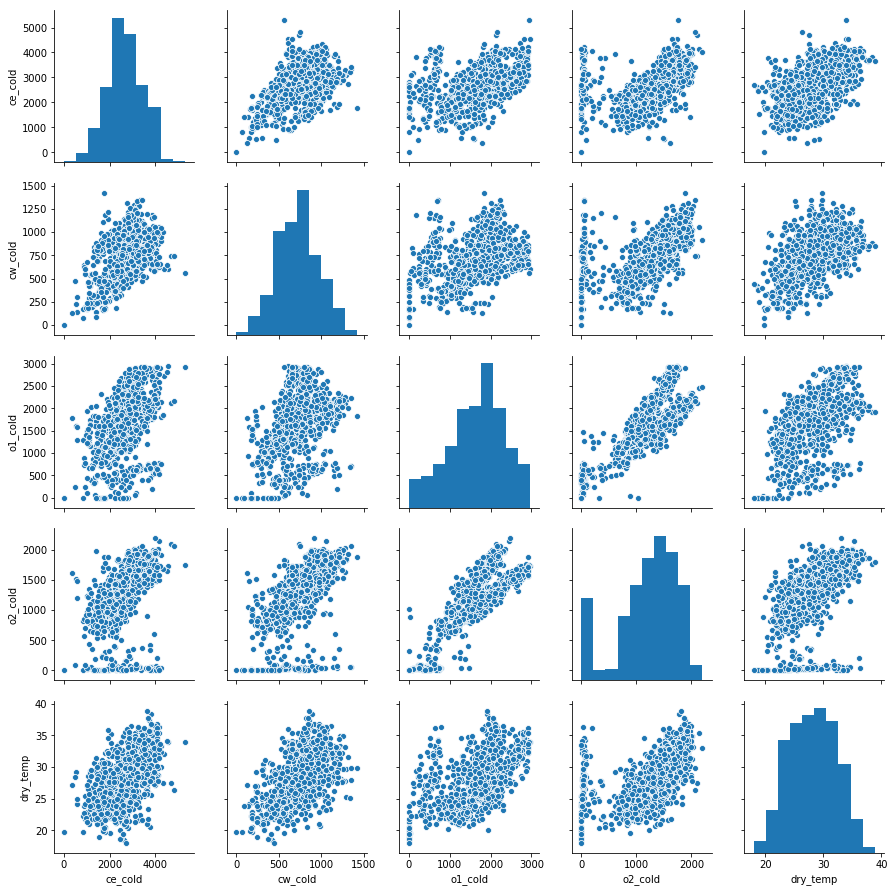

In [31]:
sns.pairplot(
    data=df[workday & daytime & summer].sample(1000)[['ce_cold', 'cw_cold', 'o1_cold', 'o2_cold', 'dry_temp']],
    kind='scatter')

#### Office 1 Colling  & Dry Temperature

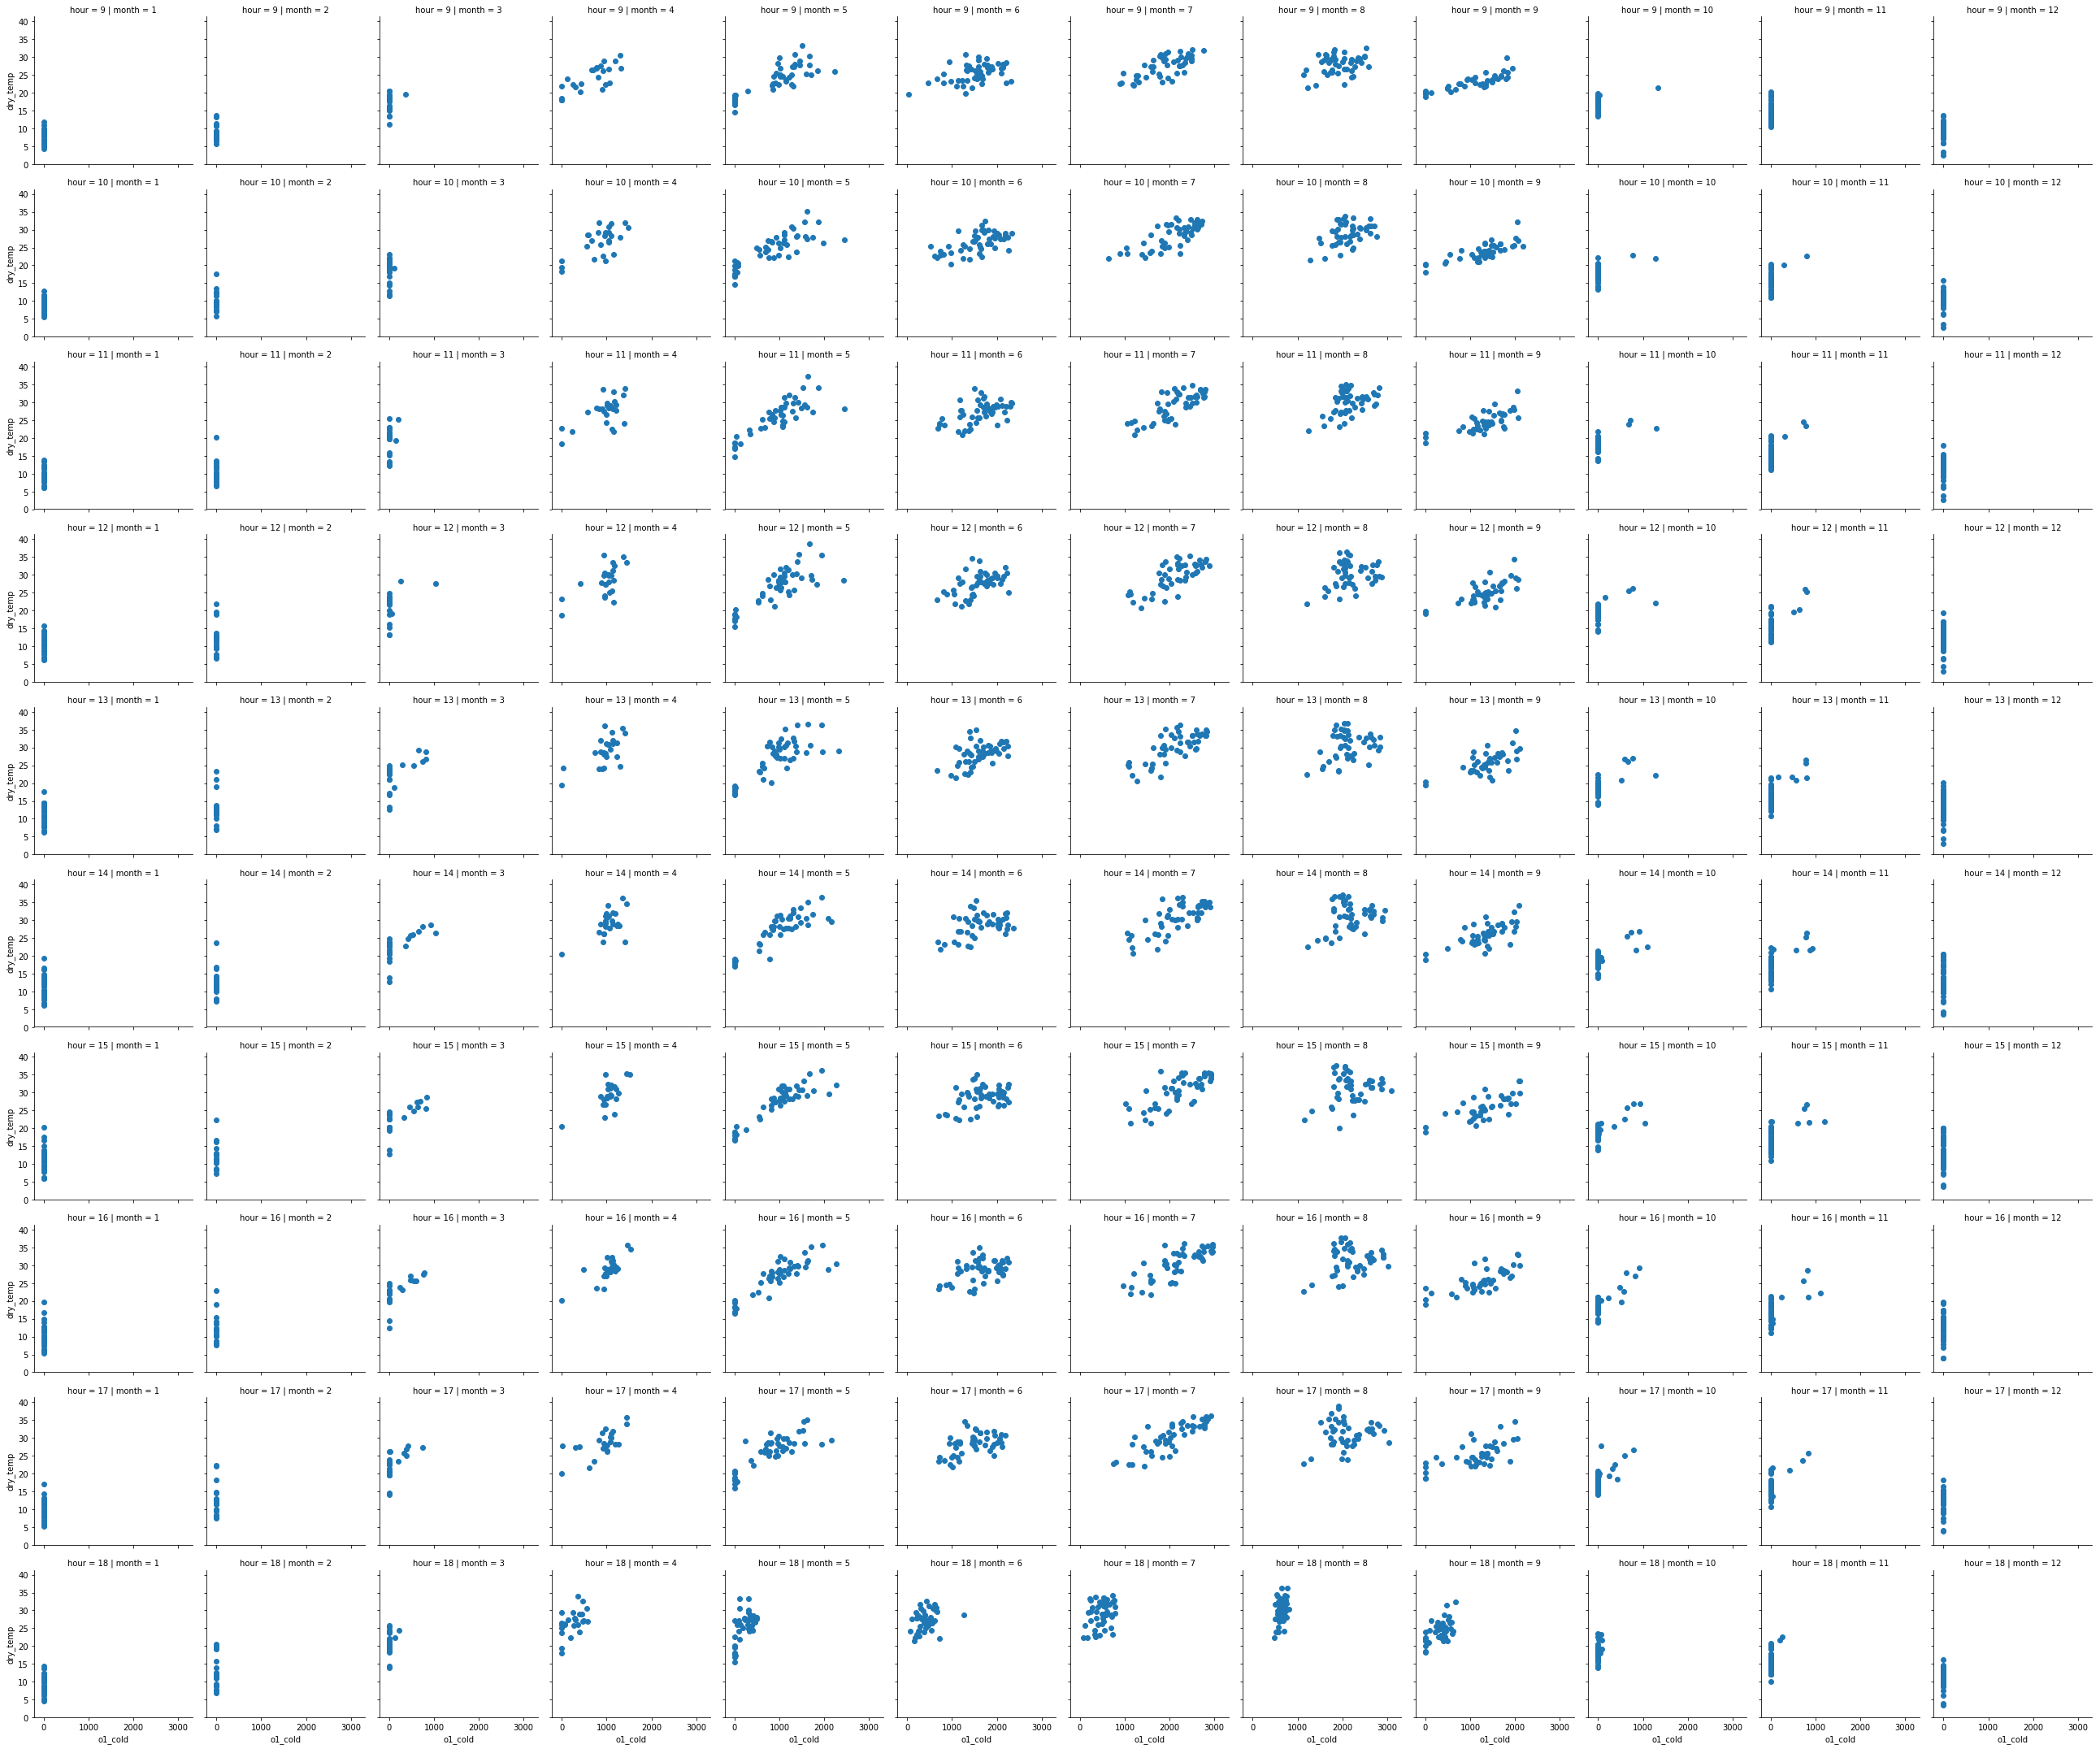

In [32]:
g = sns.FacetGrid(df[workday & daytime][['o1_cold', 'dry_temp', 'month', 'hour']], col='month', row='hour')
g = g.map(plt.scatter, 'o1_cold', 'dry_temp')

#### Commercial West Colling & Dry Temperature

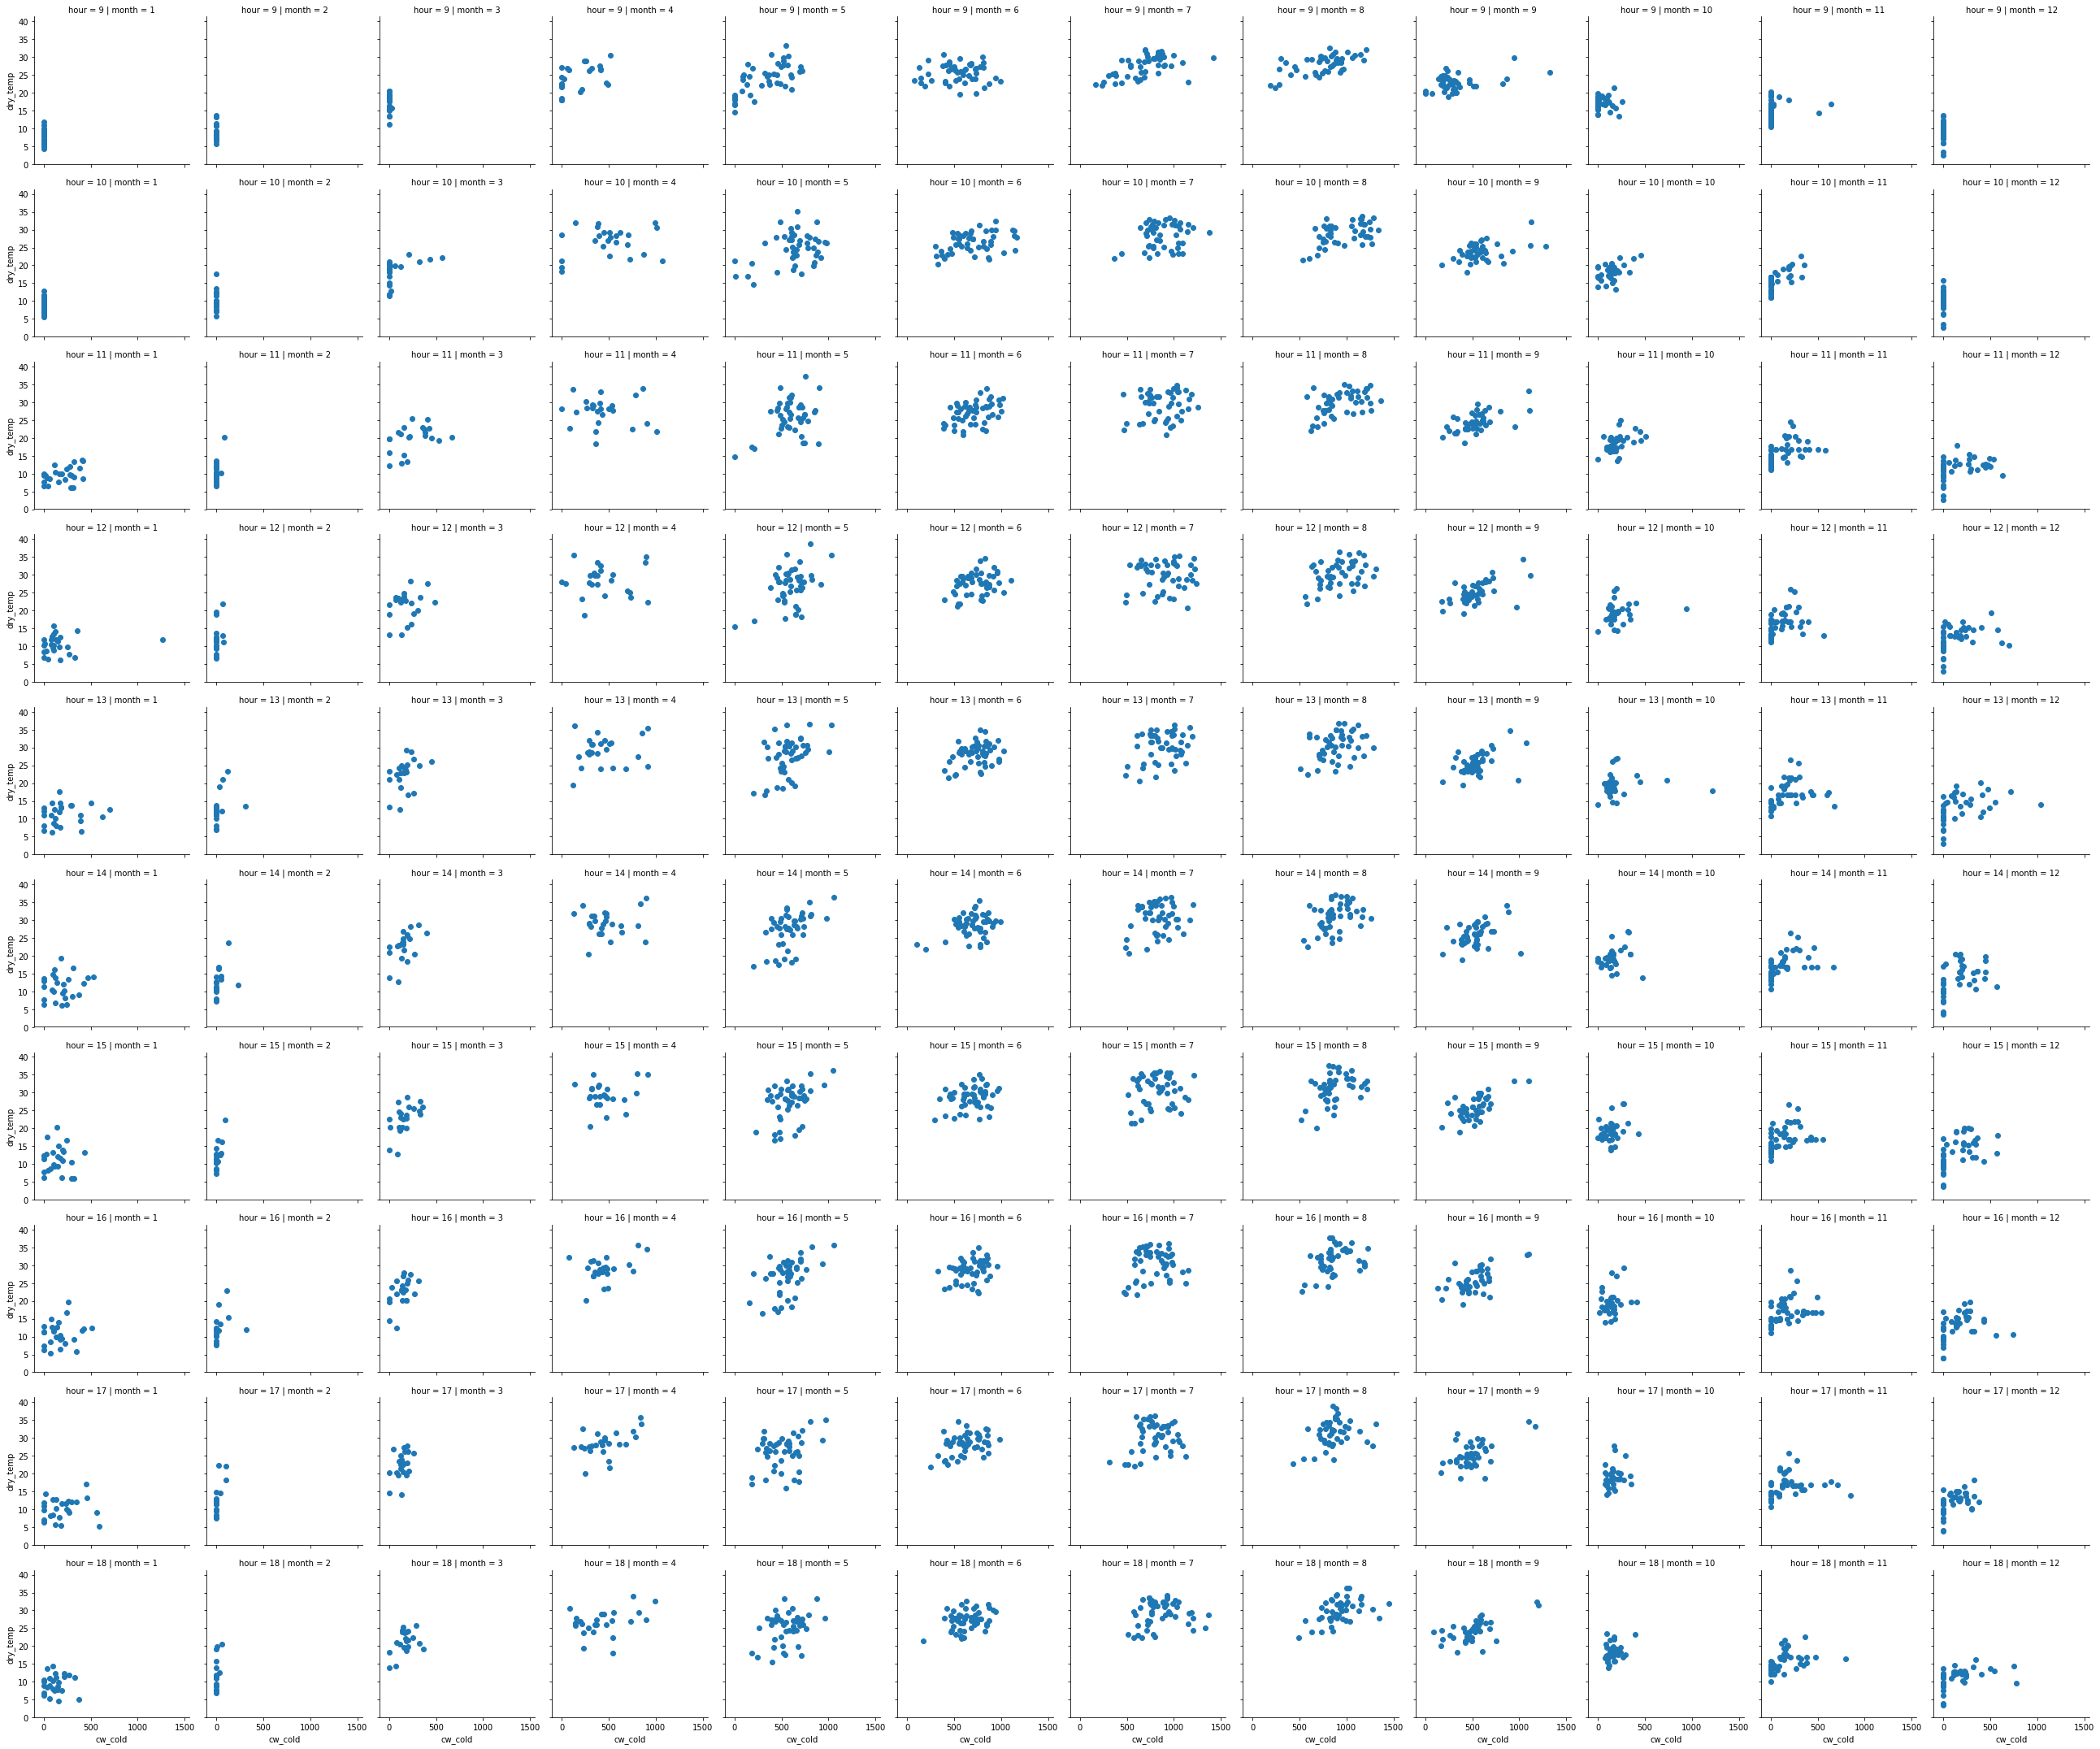

In [33]:
g = sns.FacetGrid(df[workday & daytime][['cw_cold', 'dry_temp', 'month', 'hour']], col='month', row='hour')
g = g.map(plt.scatter, 'cw_cold', 'dry_temp')

## ACF

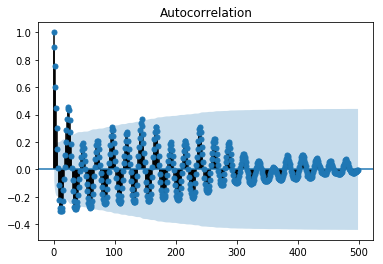

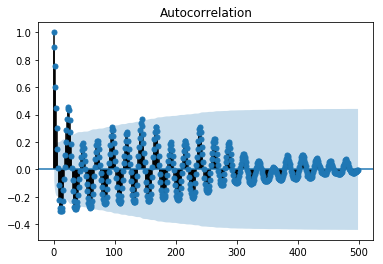

In [40]:
plot_acf(df['o1_cold'].iloc[8000:8500])